# Demo: 2 system can have 2 separate point of view on the same data

In this demo we demonstrate how can two separate system have a different point of view on the same data, leading to distinct reasoning.

For this demo we will leverage the famous pizza ontology (<https://github.com/owlcs/pizza-ontology/>). We will define a data graph of pizzas, their toppings and other pieces of information. We also imagine 2 systems:
- The semantic validator is responsible for validating the data graph conforms with the knowledge model of our company
- The pizza search engine enables you to search for pizzas

This demo focuses on W3C Semantic Web standards. We aim to demonstrate how the W3C set of standards based on RDF lets you build any component of a KG.

Regarding what a KG is, we derive our RDF-based representation inspired from our understanding of the great book "Knowledge Graphs" (<https://kgbook.org/>). Hence, the KG we will define is based on the Directed Edge Labelled Graph (DELG) model (RDF). As defined in the book we will distinguish between the data graph and the domain graph. The data graph represent the data, the domain graph represent the knowledge, and there exists a mapping between the both graph. The following figure summarise our definition of a KG derived from the book.

![KG definition](data/kg_def_sw_technos.png "Title")

Round boxes denote components, while squared ones denote processes. Bold names in round boxes are the main components' labels. Some alternative labels are added below and in parentheses. The boxes' imbrications denote composition relations. The round box labelled __Mapping__ straddles the __Domain graph__ and __Data graph__ boxes denoting its mapping role. Finally, some SW candidate technologies to implement each component are mentioned in blue bold italic and underlined letters.

In [1]:
from rdflib import Graph, URIRef
from rdflib.namespace import Namespace, OWL, RDF, RDFS

from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load the IR ontology into an RDFlib Graph
ir_onto_graph = Graph()
ir_onto_graph.parse("../information-retrieval-ontology.ttl")
ir_onto_ns = Namespace("http://www.msesboue.org/o/ir-ontology#")
ir_onto_graph.bind(prefix="ir-onto", namespace=ir_onto_ns) # setup a namespace for nicer human readable display

In [3]:
# Load the Pizza ontology into an RDFlib Graph
pizza_onto_graph = Graph()
pizza_onto_graph.parse("./data/pizza.ttl")
pizza_onto_ns = Namespace("http://www.co-ode.org/ontologies/pizza/pizza.owl#")
pizza_onto_graph.bind(prefix="pizza-onto", namespace=pizza_onto_ns)

In [4]:
# Let us define our data graph

pizza_data_graph = Graph()
pizza_data_ns = Namespace("http://www.msesboue.org/data/pizza#")
pizza_data_graph.bind(prefix="pizza-data", namespace=pizza_data_ns)

In [13]:
pizza_data_graph.add((pizza_data_ns.Margherita, pizza_data_ns.has_topping, pizza_data_ns.Mozzarella))
pizza_data_graph.add((pizza_data_ns.Margherita, pizza_data_ns.has_topping, pizza_data_ns.Tomato))
pizza_data_graph.add((pizza_data_ns.Margherita, pizza_data_ns.has_topping, pizza_data_ns.Ham))

<Graph identifier=N2b86d1468c554d73b0db32bc9910266d (<class 'rdflib.graph.Graph'>)>

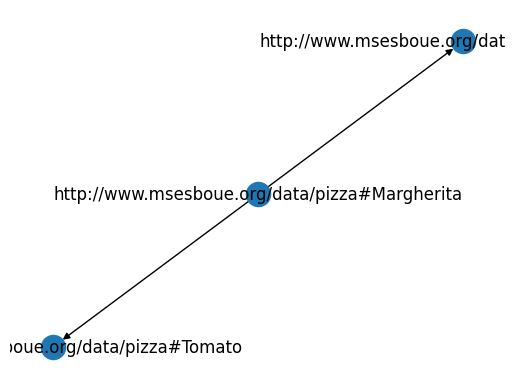

In [6]:
data_graph_viz = rdflib_to_networkx_multidigraph(pizza_data_graph)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(data_graph_viz, scale=2)
edge_labels = nx.get_edge_attributes(data_graph_viz, 'r')
nx.draw_networkx_edge_labels(data_graph_viz, pos, edge_labels=edge_labels)
nx.draw(data_graph_viz, with_labels=True)

#if not in interactive mode for 
plt.show()

In [18]:
data_g_2_pizza_onto_map = Graph()
data_g_2_pizza_onto_map.bind(prefix="pizza-onto", namespace=pizza_onto_ns)
data_g_2_pizza_onto_map.bind(prefix="pizza-data", namespace=pizza_data_ns)

data_g_2_pizza_onto_map.add((pizza_data_ns.Margherita, RDF.type, pizza_onto_ns.Margherita))
# data_g_2_pizza_onto_map.add((pizza_data_ns.Margherita, RDF.type, OWL.Class))

data_g_2_pizza_onto_map.add((pizza_data_ns.Mozzarella, RDF.type, pizza_onto_ns.MozzarellaTopping))
# data_g_2_pizza_onto_map.add((pizza_data_ns.Mozzarella, RDF.type, OWL.Class))

data_g_2_pizza_onto_map.add((pizza_data_ns.Tomato, RDF.type, pizza_onto_ns.TomatoTopping))
data_g_2_pizza_onto_map.add((pizza_data_ns.Ham, RDF.type, pizza_onto_ns.HamTopping))
# data_g_2_pizza_onto_map.add((pizza_data_ns.Tomato, RDF.type, OWL.Class))

data_g_2_pizza_onto_map.add((pizza_data_ns.has_topping, OWL.equivalentProperty, pizza_onto_ns.hasTopping))
data_g_2_pizza_onto_map.add((pizza_data_ns.has_topping, RDF.type, OWL.ObjectProperty))

<Graph identifier=N74d739bd868745b79549de5987ed37b3 (<class 'rdflib.graph.Graph'>)>

In [19]:
data_into_pizza_onto_g = pizza_onto_graph + data_g_2_pizza_onto_map + pizza_data_graph

data_into_pizza_onto_g.serialize(destination="./data/data_into_pizza_onto_g.ttl", format="turtle")

<Graph identifier=N5fbc0e0c6fe2453a9e2b7c5dbde5808e (<class 'rdflib.graph.Graph'>)>